# Covariância

A covariância é uma medida que expressa o grau de interdependência linear entre duas variáveis.

A covariância quantifica o quanto uma variável se altera em resposta às mudanças em outra variável.

No caso da covariância positiva, quando os valores de uma variável aumentam, os valores da outra também tendem a aumentar.

Na covariância negativa, o aumento nos valores de uma variável implica o decréscimo nos valores da outra variável.

## Covariância da População

<font size="5">
$\text{Cov(x, y)} = \frac{\sum_{i=1}^{N} (x_{i} - \mu_{x}) (y_{i} - \mu_{y})}{N}$

## Covariância da Amosta


<font size="5">
$\text{Cov(x, y)} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x}) (y_{i} - \bar{y})}{(n - 1)}$

___

# Coeficiente de Correlação

<font size="5">
$\text{CC} = \frac{\text{Cov(x, y)}}{S_{x}S_{y}}$

___

## Calculo Covariância Altura e Peso

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [4]:
df = pd.read_csv('data/altura-peso-br.csv')
df.describe()

,Altura(m),Peso(kg)
count,10000.000000,10000.000000
mean,1.685691,73.228260
std,0.097816,14.563851
min,1.380000,29.300000
25%,1.610000,61.600000
50%,1.680000,73.100000
75%,1.760000,84.900000
max,2.010000,122.500000


In [5]:
x = df.loc[df['Sexo'] == 'M']['Altura(m)']
x

0       1.88
1       1.75
2       1.88
3       1.82
4       1.77
        ... 
4995    1.75
4996    1.75
4997    1.70
4998    1.82
4999    1.79
Name: Altura(m), Length: 5000, dtype: float64

In [6]:
x_arr = x.values
x_arr

array([1.88, 1.75, 1.88, ..., 1.7 , 1.82, 1.79], shape=(5000,))

In [7]:
y = df.loc[df['Sexo'] == 'M']['Peso(kg)']
y.head()

0    109.7
1     73.6
2     96.5
3     99.8
4     93.6
Name: Peso(kg), dtype: float64

In [8]:
y_arr = y.values
y_arr

array([109.7,  73.6,  96.5, ...,  90.4,  84.3,  90.2], shape=(5000,))

In [9]:
medx = st.mean(x_arr)
medy = st.mean(y_arr)
print(medx, medy)

1.75327 84.8308


In [10]:
xs = x_arr - medx
xs

array([ 0.12673, -0.00327,  0.12673, ..., -0.05327,  0.06673,  0.03673],
      shape=(5000,))

In [11]:
ys = y_arr - medy
ys

array([ 24.8692, -11.2308,  11.6692, ...,   5.5692,  -0.5308,   5.3692],
      shape=(5000,))

In [12]:
xy = xs * ys
xy

array([ 3.15167372,  0.03672472,  1.47883772, ..., -0.29667128,
       -0.03542028,  0.19721072], shape=(5000,))

In [13]:
cov1 = xy.sum()
cov1

np.float64(2818.8004200000005)

In [14]:
cov2 = len(xs) - 1
cov2

4999

In [15]:
covcalc = cov1 / cov2
covcalc

np.float64(0.5638728585717144)

In [16]:
covfun = st.covariance(x, y)
covfun

0.5638728585717145

In [17]:
corr = covfun / (st.stdev(x) * st.stdev(y))
corr

0.8624578344354656

In [18]:
ap = pd.DataFrame({'altura': x, 'peso': y})
ap

,altura,peso
0,1.88,109.7
1,1.75,73.6
2,1.88,96.5
3,1.82,99.8
4,1.77,93.6
...,...,...
4995,1.75,80.3
4996,1.75,72.3
4997,1.70,90.4
4998,1.82,84.3


In [19]:
ap.corr()

,altura,peso
altura,1.000000,0.862458
peso,0.862458,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

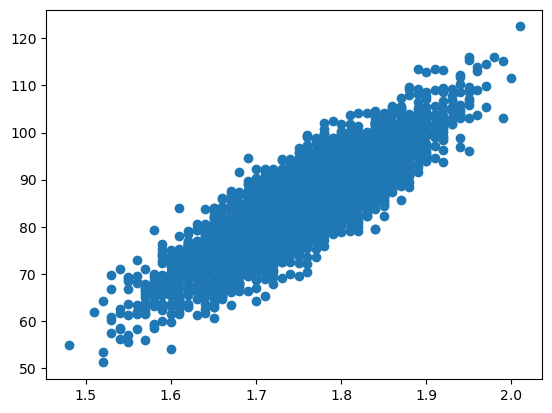

In [20]:
plt.scatter(x, y)
plt.show

<Axes: xlabel='altura', ylabel='peso'>

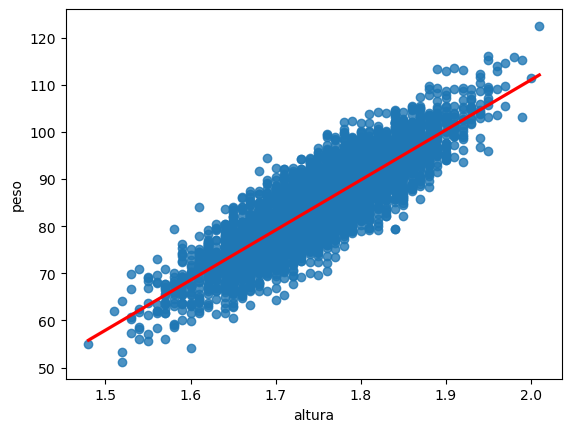

In [28]:
import seaborn as sns

sns.regplot(data=ap, x='altura', y='peso', line_kws=dict(color="r"))

<Axes: xlabel='altura', ylabel='peso'>

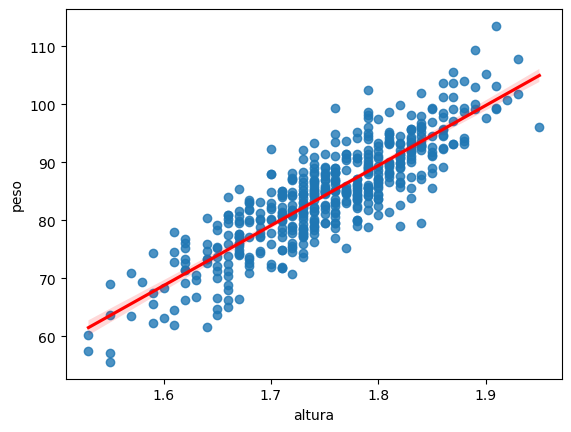

In [29]:
sns.regplot(data=ap.iloc[2500:3000], x='altura', y='peso', line_kws=dict(color="r"))